# Xenia's Sleep Analysis Code for up to 3 groups

This code is designed to be run in one fell swoop with all the preparation needed being done in the first few lines. If the amount of groups is different than here, you may need to change stuff - otherwise it should work.

## 1) Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics as stats
import scipy.stats as ss
import os
import datetime

## User Instructions
Please input filepaths to the FOLDER containing your data for a specific condition in the cell below. The folder should in turn contain the **folders** with your pre-analized (Matlab) Sleep Analysis data.

Example:

"Controls" 
    <br>> "2025_10_13_Control_Box1"</br>
       > "2025_10_14_Control_Box1"
    <br>> "2025_10_15_Control_Box1"</br>
   ... etc.

Ideally, this is the only cell you need to interact with. 

All results will be saved to the path you specify as "path_graphics", including the results of the t-tests in a .txt file. Aside from adding groups (or unprecedented errors) there are no real reasons for you to interact with other cells.

In [2]:
#Which time did you use for binning? (In Matlab)
binned = 2 #in minutes
'''Which limit to set for the y-axis on the graphics?'''
lim_y = 45 #for sleep
lim_y_wake = 15
'''Limits to set for bar plots'''
lim_y_bp_sleep = 60
lim_y_bp_wake = 15

#How many groups are there (including the control)? (Currently supports 2 or 3)
group_nr = 2 
#Which names do you want to give your groups? (strings)
ctrl_name = "control"
group_1_name = "continuous light"
group_2_name = ""

#filepaths for the folder containing your group data
ctrl_filepath = r"C:\Users\xringwal\Desktop\Xenia\WorkingMem\Comparison\Sleep Data\Control"
grp1_filepath = r"C:\Users\xringwal\Desktop\Xenia\WorkingMem\Comparison\Sleep Data\ContinuousLight"
grp2_filepath = r""

#This is where you'll save your graphics in the last step
path_graphics = r"C:\Users\xringwal\Desktop\Xenia\WorkingMem\Comparison\Sleep Data\Pooled_graphics"

In [3]:
# set up output file for t-test data
name_of_file = "t_test_output"
output_file = os.path.join(path_graphics, name_of_file+".txt") 

x = datetime.datetime.now()

with open(output_file, "w") as f:
    f.write("Output from: "+x.strftime("%d"+" "+"%b"+" "+"%Y")+"\n") #adds date to output file

In [4]:
#ctrl
root = ctrl_filepath
i=0
ctrl_dict=dict()
for item in os.listdir(root):
    if os.path.isdir(os.path.join(root, item)):
        ctrl_dict["path_"+str(i)]=(os.path.join(root, item))
        i=i+1

#group1
root = grp1_filepath
i=0
cont_dict=dict()
for item in os.listdir(root):
    if os.path.isdir(os.path.join(root, item)):
        cont_dict["path_"+str(i)]=(os.path.join(root, item))
        i=i+1

#group2
if group_nr >=3:
    root = grp2_filepath
    i=0
    grp2_dict=dict()
    for item in os.listdir(root):
        if os.path.isdir(os.path.join(root, item)):
            grp2_dict["path_"+str(i)]=(os.path.join(root, item))
            i=i+1

The next cell features the automatic setup of the follow up files as lists in order to concatenate them in the following step.

In [5]:
#ctrl
i = 0
act_ctrl_list=list()
for key in ctrl_dict:
    act_ctrl_list.append(pd.read_csv(ctrl_dict[key]+r"\output_binned_act_ctrl.csv", header=None))
    i= i+1
i = 0
rest_ctrl_list=list()
for key in ctrl_dict:
    rest_ctrl_list.append(pd.read_csv(ctrl_dict[key]+r"\output_binned_rest_ctrl.csv", header=None))
    i= i+1
i = 0
wakeAct_ctrl_list=list()
for key in ctrl_dict:
    wakeAct_ctrl_list.append(pd.read_csv(ctrl_dict[key]+r"\output_binned_wakeAct_ctrl.csv", header=None))
    i= i+1

#continuous light/group 1
i = 0
act_cont_list=list()
for key in cont_dict:
    act_cont_list.append(pd.read_csv(cont_dict[key]+r"\output_binned_act_ctrl.csv", header=None))
    i= i+1
i = 0
rest_cont_list=list()
for key in cont_dict:
    rest_cont_list.append(pd.read_csv(cont_dict[key]+r"\output_binned_rest_ctrl.csv", header=None))
    i= i+1
i = 0
wakeAct_cont_list=list()
for key in cont_dict:
    wakeAct_cont_list.append(pd.read_csv(cont_dict[key]+r"\output_binned_wakeAct_ctrl.csv", header=None))
    i= i+1
    
if group_nr>=3:
    #group2
    i = 0
    act_grp2_list=list()
    for key in grp2_dict:
        act_grp2_list.append(pd.read_csv(cont_dict[key]+r"\output_binned_act_ctrl.csv", header=None))
        i= i+1
    i = 0
    rest_grp2_list=list()
    for key in grp2_dict:
        rest_grp2_list.append(pd.read_csv(cont_dict[key]+r"\output_binned_rest_ctrl.csv", header=None))
        i= i+1
    i = 0
    wakeAct_grp2_list=list()
    for key in grp2_dict:
        wakeAct_grp2_list.append(pd.read_csv(cont_dict[key]+r"\output_binned_wakeAct_ctrl.csv", header=None))
        i= i+1

## Concatenate 
You may have to add things here, if you pool more than two sets of data.

In [6]:
#concat controls
df_Act_control = pd.concat(act_ctrl_list, axis=1)
df_rest_control = pd.concat(rest_ctrl_list, axis=1)
df_wakeAct_control = pd.concat(wakeAct_ctrl_list, axis=1)

In [7]:
#concat group1
df_Act_continuouslight = pd.concat(act_cont_list, axis=1)
df_rest_continuouslight = pd.concat(rest_cont_list, axis=1)
df_wakeAct_continuouslight = pd.concat(wakeAct_cont_list, axis=1)    

In [8]:
#concat group 2
if group_nr >=3:
    df_Act_tapping = pd.concat(act_grp2_list, axis=1)
    df_rest_tapping = pd.concat(rest_grp2_list, axis=1)
    df_wakeAct_tapping = pd.concat(wakeAct_grp2_list, axis=1)  

## Multiply time to 60 minutes
We multiply the data we previously cut into chunks so we get 60 minutes in the end. This uses the binned time from the first few cells, so if that time is not correct for what you did with your data, it can be a source of errors!

In [9]:
tosixty = 60/binned

#Rest
df_rest_control_hour = df_rest_control.mul(tosixty)
df_rest_continuouslight_hour = df_rest_continuouslight.mul(tosixty)

#WakeActivity
df_wakeAct_control_hour = df_wakeAct_control.mul(1)
df_wakeAct_continuouslight_hour = df_wakeAct_continuouslight.mul(1)

if group_nr >= 3:
    df_rest_tapping_hour = df_rest_tapping.mul(tosixty)
    df_wakeAct_tapping_hour = df_wakeAct_tapping.mul(1)

## Single Graphics
Singular conditions.

len x 745
len y 745


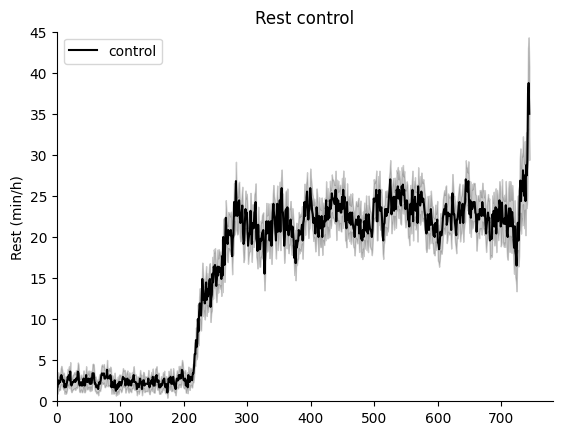

In [10]:
##Control
y = df_rest_control_hour.mean(axis=1)
x = np.linspace(0,len(y)-1,len(y))
print("len x",len(x))
print("len y",len(y))

# fit a linear curve and estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est_ctrl = df_rest_control_hour.mean(axis=1)
y_err_ctrl = df_rest_control_hour.sem(axis=1)

fig, ax = plt.subplots()
ax.plot(x, y_est_ctrl, '-', color='black',label=ctrl_name)
ax.fill_between(x, y_est_ctrl - y_err_ctrl, y_est_ctrl + y_err_ctrl, alpha=0.2, color='black')

ax.set_xlim(0,)
ax.set_ylim(0,lim_y)
ax.set_title("Rest "+str(ctrl_name))
ax.set_ylabel("Rest (min/h)")
plt.legend(loc="upper left")
    
sns.despine(right=True, bottom=False)
fig.savefig(path_graphics+r"\Rest_pooled_"+ctrl_name+"_only.pdf")

len x 738
len y 738


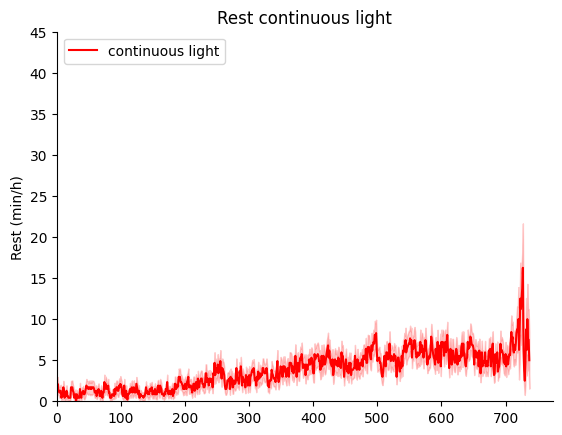

In [11]:
## Group 1
y = df_rest_continuouslight_hour.mean(axis=1)
x = np.linspace(0,len(y)-1,len(y))
print("len x",len(x))
print("len y",len(y))

# fit a linear curve and estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est_cont = df_rest_continuouslight_hour.mean(axis=1)
y_err_cont = df_rest_continuouslight_hour.sem(axis=1)

fig, ax = plt.subplots()
ax.plot(x, y_est_cont, '-', color='red',label=group_1_name)
ax.fill_between(x, y_est_cont - y_err_cont, y_est_cont + y_err_cont, alpha=0.2, color='red')

ax.set_xlim(0,)
ax.set_ylim(0,lim_y)
ax.set_title("Rest "+str(group_1_name))
ax.set_ylabel("Rest (min/h)")
plt.legend(loc="upper left")
    
sns.despine(right=True, bottom=False)
fig.savefig(path_graphics+r"\Rest_pooled_"+str(group_1_name)+"_only.pdf")

In [12]:
## Group 2
if group_nr>=3:
    y = df_rest_tapping_hour.mean(axis=1)
    x = np.linspace(0,len(y)-1,len(y))
    print("len x",len(x))
    print("len y",len(y))
    
    # fit a linear curve and estimate its y-values and their error.
    a, b = np.polyfit(x, y, deg=1)
    y_est_tap = df_rest_tapping_hour.mean(axis=1)
    y_err_tap = df_rest_tapping_hour.sem(axis=1)
    
    fig, ax = plt.subplots()
    ax.plot(x, y_est_tap, '-', color='green',label=group_2_name)
    ax.fill_between(x, y_est_tap - y_err_tap, y_est_tap + y_err_tap, alpha=0.2, color='green')
    
    ax.set_xlim(0,)
    ax.set_ylim(0,lim_y)
    ax.set_title("Rest "+str(group_2_name))
    ax.set_ylabel("Rest (min/h)")
    plt.legend(loc="upper left")
        
    sns.despine(right=True, bottom=False)
    fig.savefig(path_graphics+r"\Rest_pooled_"+group_2_name+"_only.pdf")

**Wake Activity Single Graphs**

len x 745
len y 745


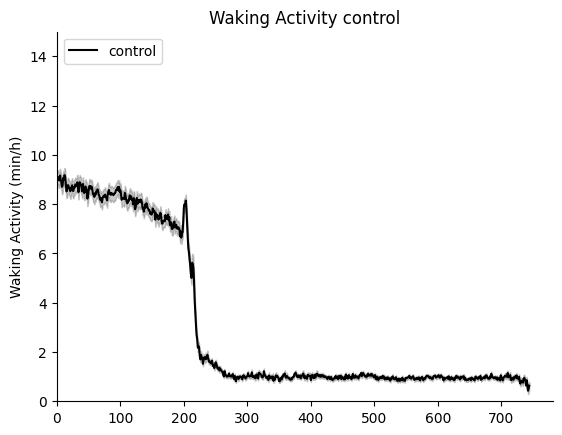

In [13]:
##Control
y = df_wakeAct_control_hour.mean(axis=1)
x = np.linspace(0,len(y)-1,len(y))
print("len x",len(x))
print("len y",len(y))

# fit a linear curve and estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est_ctrl = df_wakeAct_control_hour.mean(axis=1)
y_err_ctrl = df_wakeAct_control_hour.sem(axis=1)

fig, ax = plt.subplots()
ax.plot(x, y_est_ctrl, '-', color='black',label=ctrl_name)
ax.fill_between(x, y_est_ctrl - y_err_ctrl, y_est_ctrl + y_err_ctrl, alpha=0.2, color='black')

ax.set_xlim(0,)
ax.set_ylim(0,lim_y_wake)
ax.set_title("Waking Activity "+ctrl_name)
ax.set_ylabel("Waking Activity (min/h)")
plt.legend(loc="upper left")
    
sns.despine(right=True, bottom=False)
fig.savefig(path_graphics+r"\WakeAct_pooled_"+ctrl_name+"_only.pdf")

len x 738
len y 738


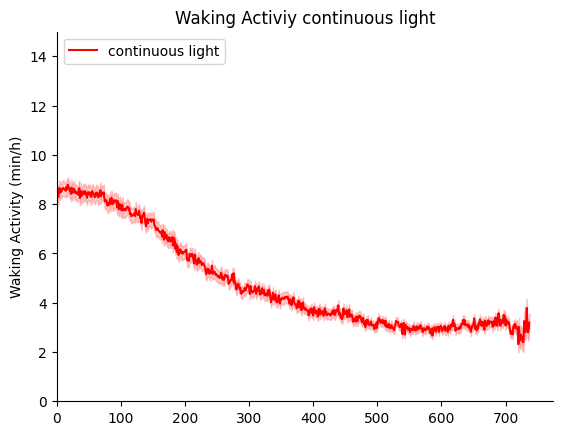

In [14]:
## Group 1
y = df_wakeAct_continuouslight_hour.mean(axis=1)
x = np.linspace(0,len(y)-1,len(y))
print("len x",len(x))
print("len y",len(y))

# fit a linear curve and estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est_cont = df_wakeAct_continuouslight_hour.mean(axis=1)
y_err_cont = df_wakeAct_continuouslight_hour.sem(axis=1)

fig, ax = plt.subplots()
ax.plot(x, y_est_cont, '-', color='red',label=group_1_name)
ax.fill_between(x, y_est_cont - y_err_cont, y_est_cont + y_err_cont, alpha=0.2, color='red')

ax.set_xlim(0,)
ax.set_ylim(0,lim_y_wake)
ax.set_title("Waking Activiy "+group_1_name)
ax.set_ylabel("Waking Activity (min/h)")
plt.legend(loc="upper left")
    
sns.despine(right=True, bottom=False)
fig.savefig(path_graphics+r"\WakeAct_pooled_"+group_1_name+"_only.pdf")

In [15]:
## Group2
if group_nr >= 3:
    y = df_wakeAct_tapping_hour.mean(axis=1)
    x = np.linspace(0,len(y)-1,len(y))
    print("len x",len(x))
    print("len y",len(y))
    
    # fit a linear curve and estimate its y-values and their error.
    a, b = np.polyfit(x, y, deg=1)
    y_est_tap = df_wakeAct_tapping_hour.mean(axis=1)
    y_err_tap = df_wakeAct_tapping_hour.sem(axis=1)
    
    fig, ax = plt.subplots()
    ax.plot(x, y_est_tap, '-', color='green',label=group_2_name)
    ax.fill_between(x, y_est_tap - y_err_tap, y_est_tap + y_err_tap, alpha=0.2, color='green')
    
    ax.set_xlim(0,)
    ax.set_ylim(0,lim_y)
    ax.set_title("Waking Activity "+group_2_name)
    ax.set_ylabel("Waking Activity (min/h)")
    plt.legend(loc="upper left")
        
    sns.despine(right=True, bottom=False)
    fig.savefig(path_graphics+r"\WakeAct_pooled_"+group_2_name+"_only.pdf")

## Double Graphics
One condition shown together with the control.

## Group 2 & Control

In [16]:
# Cut control to same length as group2
if group_nr >=3:
    if len(df_rest_control_hour)>len(df_rest_tapping_hour):
        stop = len(df_rest_control_hour)
        cut_helper = len(df_rest_tapping_hour)#length of your stimulus
        df_rest_control_hour = df_rest_control_hour.drop(labels=range(cut_helper,stop), axis = 0)
    else:
        stop = len(df_rest_tapping_hour)
        cut_helper = len(df_rest_control_hour)#length of your stimulus
        df_rest_tapping_hour = df_rest_tapping_hour.drop(labels=range(cut_helper,stop), axis = 0)

In [17]:
if group_nr >= 3:
    cut_helper_2 = len(df_rest_tapping_hour)-1
    
    y = df_rest_tapping_hour.mean(axis=1)
    x = np.arange(0, len(y), 1)
    print("len x",len(x))
    print("len y",len(y))
    
    
    
    # fit a linear curve an estimate its y-values and their error.
    a, b = np.polyfit(x, y, deg=1)
    y_est_ctrl = df_rest_control_hour.mean(axis=1)
    y_err_ctrl = df_rest_control_hour.sem(axis=1)
    
    y_est_tap=df_rest_tapping_hour.mean(axis=1)
    y_err_tap = df_rest_tapping_hour.sem(axis=1)
    
    
    fig, ax = plt.subplots()
    ax.plot(x, y_est_ctrl, '-', color='black',label=ctrl_name)
    ax.fill_between(x, y_est_ctrl - y_err_ctrl, y_est_ctrl + y_err_ctrl, alpha=0.2, color='black')
    
    ax.plot(x, y_est_tap, '-', color='green',label=group_2_name)
    ax.fill_between(x, y_est_tap - y_err_tap, y_est_tap + y_err_tap, alpha=0.2, color='green')
    
    #rectangle = plt.Rectangle((88,0),150, 60, fc='grey', alpha=0.2)
    #plt.gca().add_patch(rectangle)
    
    ax.set_xlim(0,)
    ax.set_ylim(0,lim_y)
    ax.set_title("Rest "+group_2_name+"&"+ctrl_name)
    
    ax.set_ylabel("Rest (min/h)")
    plt.legend(loc="upper left")
        
    sns.despine(right=True, bottom=False)
    fig.savefig(path_graphics+r"\Rest_pooled_"+group_2_name+"+"+ctrl_name+".pdf")

## Continuous & Control
To cut the control again, we first have to concatenate it anew and repeat the multiply step.

In [18]:
#concat controls
df_Act_control = pd.concat(act_ctrl_list, axis=1)
df_rest_control = pd.concat(rest_ctrl_list, axis=1)
df_wakeAct_control = pd.concat(wakeAct_ctrl_list, axis=1)

In [19]:
#hochrechnen auf 60 Minuten
df_rest_control_hour = df_rest_control.mul(tosixty)

In [20]:
# Cut control to same length as group 1
if len(df_rest_control_hour)>len(df_rest_continuouslight_hour):
    stop = len(df_rest_control_hour)
    cut_helper = len(df_rest_continuouslight_hour)#length of your stimulus
    df_rest_control_hour = df_rest_control_hour.drop(labels=range(cut_helper,stop), axis = 0)
else:
    stop = len(df_rest_continuouslight_hour)
    cut_helper = len(df_rest_control_hour)#length of your stimulus
    df_rest_continuouslight_hour = df_rest_continuouslight_hour.drop(labels=range(cut_helper,stop), axis = 0)

len x 738
len y 738


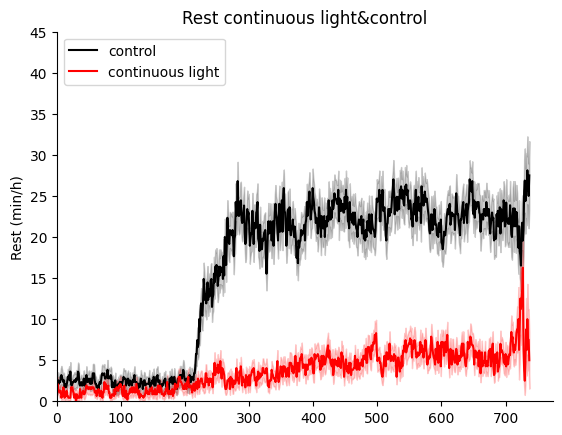

In [21]:
cut_helper_2 = len(df_rest_continuouslight_hour)-1

y = df_rest_continuouslight_hour.mean(axis=1)
x = np.linspace(0,cut_helper_2, cut_helper)
print("len x",len(x))
print("len y",len(y))

# fit a linear curve an estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est_ctrl = df_rest_control_hour.mean(axis=1)
y_err_ctrl = df_rest_control_hour.sem(axis=1)

y_est_cont = df_rest_continuouslight_hour.mean(axis=1)
y_err_cont = df_rest_continuouslight_hour.sem(axis=1)


fig, ax = plt.subplots()
ax.plot(x, y_est_ctrl, '-', color='black',label=ctrl_name)
ax.fill_between(x, y_est_ctrl - y_err_ctrl, y_est_ctrl + y_err_ctrl, alpha=0.2, color='black')

ax.plot(x, y_est_cont, '-', color='red',label=group_1_name)
ax.fill_between(x, y_est_cont - y_err_cont, y_est_cont + y_err_cont, alpha=0.2, color='red')

#rectangle = plt.Rectangle((88,0),150, 60, fc='grey', alpha=0.2)
#plt.gca().add_patch(rectangle)

ax.set_xlim(0,)
ax.set_ylim(0,lim_y)
ax.set_title("Rest "+group_1_name+"&"+ctrl_name)

ax.set_ylabel("Rest (min/h)")
plt.legend(loc="upper left")
    
sns.despine(right=True, bottom=False)
fig.savefig(path_graphics+r"\Rest_pooled_"+group_1_name+"+"+ctrl_name+".pdf")

## **Double Graphics - Waking Activity**

## Control & Tapping

In [22]:
# Cut control to same length as group_2
if group_nr >=3:
    if len(df_wakeAct_control_hour)>len(df_wakeAct_tapping_hour):
        stop = len(df_wakeAct_control_hour)
        cut_helper = len(df_wakeAct_tapping_hour)#length of your stimulus
        df_wakeAct_control_hour = df_wakeAct_control_hour.drop(labels=range(cut_helper,stop), axis = 0)
    else:
        stop = len(df_wakeAct_tapping_hour)
        cut_helper = len(df_wakeAct_control_hour)#length of your stimulus
        df_wakeAct_tapping_hour = df_wakeAct_tapping_hour.drop(labels=range(cut_helper,stop), axis = 0)

In [23]:
if group_nr >= 3:
    cut_helper_2 = len(df_wakeAct_tapping_hour)-1
    
    y = df_wakeAct_tapping_hour.mean(axis=1)
    x = np.arange(0, len(y), 1)
    print("len x",len(x))
    print("len y",len(y))
    
    
    
    # fit a linear curve an estimate its y-values and their error.
    a, b = np.polyfit(x, y, deg=1)
    y_est_ctrl = df_wakeAct_control_hour.mean(axis=1)
    y_err_ctrl = df_wakeAct_control_hour.sem(axis=1)
    
    y_est_tap=df_wakeAct_tapping_hour.mean(axis=1)
    y_err_tap = df_wakeAct_tapping_hour.sem(axis=1)
    
    
    fig, ax = plt.subplots()
    ax.plot(x, y_est_ctrl, '-', color='black',label=ctrl_name)
    ax.fill_between(x, y_est_ctrl - y_err_ctrl, y_est_ctrl + y_err_ctrl, alpha=0.2, color='black')
    
    ax.plot(x, y_est_tap, '-', color='green',label=group_2_name)
    ax.fill_between(x, y_est_tap - y_err_tap, y_est_tap + y_err_tap, alpha=0.2, color='green')
    
    #rectangle = plt.Rectangle((88,0),150, 60, fc='grey', alpha=0.2)
    #plt.gca().add_patch(rectangle)
    
    ax.set_xlim(0,)
    ax.set_ylim(0,lim_y_wake)
    ax.set_title("Waking Activity "+group_2_name+"&"+ctrl_name)
    
    ax.set_ylabel("Waking Activity (min/h)")
    plt.legend(loc="upper left")
        
    sns.despine(right=True, bottom=False)
    fig.savefig(path_graphics+r"\WakeAct_pooled_"+group_2_name+"+"+ctrl_name+".pdf")

## Continuous Light & Control

In [24]:
#concat controls
df_Act_control = pd.concat(act_ctrl_list, axis=1)
df_rest_control = pd.concat(rest_ctrl_list, axis=1)
df_wakeAct_control = pd.concat(wakeAct_ctrl_list, axis=1)

In [25]:
#hochrechnen auf 60 Minuten
df_rest_control_hour = df_rest_control.mul(1)

In [26]:
# Cut control to same length as continuous light
if len(df_wakeAct_control_hour)>len(df_wakeAct_continuouslight_hour):
    stop = len(df_wakeAct_control_hour)
    cut_helper = len(df_wakeAct_continuouslight_hour)#length of your stimulus
    df_wakeAct_control_hour = df_wakeAct_control_hour.drop(labels=range(cut_helper,stop), axis = 0)
else:
    stop = len(df_wakeAct_continuouslight_hour)
    cut_helper = len(df_wakeAct_control_hour)#length of your stimulus
    df_wakeAct_continuouslight_hour = df_wakeAct_continuouslight_hour.drop(labels=range(cut_helper,stop), axis = 0)

len x 738
len y 738


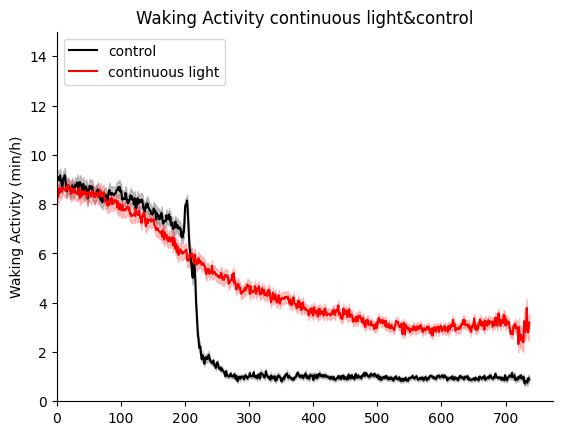

In [27]:
cut_helper_2 = len(df_wakeAct_continuouslight_hour)-1

y = df_wakeAct_continuouslight_hour.mean(axis=1)
x = np.linspace(0,cut_helper_2, cut_helper)
print("len x",len(x))
print("len y",len(y))

# fit a linear curve an estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est_ctrl = df_wakeAct_control_hour.mean(axis=1)
y_err_ctrl = df_wakeAct_control_hour.sem(axis=1)

y_est_cont = df_wakeAct_continuouslight_hour.mean(axis=1)
y_err_cont = df_wakeAct_continuouslight_hour.sem(axis=1)


fig, ax = plt.subplots()
ax.plot(x, y_est_ctrl, '-', color='black',label=ctrl_name)
ax.fill_between(x, y_est_ctrl - y_err_ctrl, y_est_ctrl + y_err_ctrl, alpha=0.2, color='black')

ax.plot(x, y_est_cont, '-', color='red',label=group_1_name)
ax.fill_between(x, y_est_cont - y_err_cont, y_est_cont + y_err_cont, alpha=0.2, color='red')

#rectangle = plt.Rectangle((88,0),150, 60, fc='grey', alpha=0.2)
#plt.gca().add_patch(rectangle)

ax.set_xlim(0,)
ax.set_ylim(0,lim_y_wake)
ax.set_title("Waking Activity "+group_1_name+"&"+ctrl_name)

ax.set_ylabel("Waking Activity (min/h)")
plt.legend(loc="upper left")
    
sns.despine(right=True, bottom=False)
fig.savefig(path_graphics+r"\Waking Activity_pooled_"+group_2_name+"+"+ctrl_name+".pdf")

## Bar plots - Rest
First, load the data & convert it into a dataframe.
You may have to add stuff here if you have more groups than 3.

In [28]:
#ctrl
i = 0
rest_night1_ctrl_list=list()
for key in ctrl_dict:
    rest_night1_ctrl_list.append(pd.read_csv(ctrl_dict[key]+r"\output_binned_rest_night1.csv", header=None))
    i= i+1
try:
    i = 0
    rest_day1_ctrl_list=list()
    for key in ctrl_dict:
        rest_day1_ctrl_list.append(pd.read_csv(ctrl_dict[key]+r"\output_binned_rest_day1.csv", header=None))
        i= i+1
except:
    pass
try:
    i = 0
    rest_testphase_ctrl_list=list()
    for key in ctrl_dict:
        rest_testphase_ctrl_list.append(pd.read_csv(ctrl_dict[key]+r"\output_binned_rest_testphase.csv", header=None))
        i= i+1
except:
    pass

#group1
i = 0
rest_night1_grp1_list=list()
for key in cont_dict:
    rest_night1_grp1_list.append(pd.read_csv(cont_dict[key]+r"\output_binned_rest_night1.csv", header=None))
    i= i+1
try:
    i = 0
    rest_day1_grp1_list=list()
    for key in cont_dict:
        rest_day1_grp1_list.append(pd.read_csv(cont_dict[key]+r"\output_binned_rest_day1.csv", header=None))
        i= i+1
except:
    pass
try:
    i = 0
    rest_testphase_grp1_list=list()
    for key in cont_dict:
        rest_testphase_grp1_list.append(pd.read_csv(cont_dict[key]+r"\output_binned_rest_testphase.csv", header=None))
        i= i+1
except:
    pass

if group_nr >=3:
    #group2
    i = 0
    rest_night1_grp2_list=list()
    for key in cont_dict:
        rest_night1_grp2_list.append(pd.read_csv(grp2_dict[key]+r"\output_binned_rest_night1.csv", header=None))
        i= i+1
    try:
        i = 0
        rest_day1_grp2_list=list()
        for key in cont_dict:
            rest_day1_grp2_list.append(pd.read_csv(grp2_dict[key]+r"\output_binned_rest_day1.csv", header=None))
            i= i+1
    except:
        pass
    try:
        i = 0
        rest_testphase_grp2_list=list()
        for key in cont_dict:
            rest_testphase_grp2_list.append(pd.read_csv(grp2_dict[key]+r"\output_binned_rest_testphase.csv", header=None))
            i= i+1
    except:
        pass


## Concatenate

In [29]:
#concat controls
df_rest_control_night1_concat = pd.concat(rest_night1_ctrl_list, axis=1)
if len(rest_day1_ctrl_list)!=0:
    df_rest_control_day1_concat = pd.concat(rest_day1_ctrl_list, axis=1)
if len(rest_testphase_ctrl_list)!=0:
    df_rest_control_rebound_concat = pd.concat(rest_testphase_ctrl_list, axis=1)

In [30]:
#concat group2
df_rest_continuouslight_night1_concat = pd.concat(rest_night1_grp1_list, axis=1)
if len(rest_day1_grp1_list)!=0:
    df_rest_continuouslight_day1_concat = pd.concat(rest_day1_grp1_list, axis=1)
if len(rest_testphase_grp1_list)!=0:
    df_rest_continuouslight_rebound_concat = pd.concat(rest_testphase_grp1_list, axis=1)

In [31]:
#concat group3
if group_nr >=3:
    df_rest_tapping_night1_concat = pd.concat(rest_night1_grp2_list, axis=1)
    if len(rest_day1_grp2_list)!=0:
        df_rest_tapping_day1_concat = pd.concat(rest_day1_grp2_list, axis=1)
    if len(rest_testphase_grp2_list)!=0:
        df_rest_tapping_rebound_concat = pd.concat(rest_testphase_grp2_list, axis=1)

## Mean per fish
Get the column averages (which are the means per fish).
Skip the NaNs.

In [32]:
#control
mean_df_rest_control_night1 = df_rest_control_night1_concat.mean(axis=0,skipna=True)
try:
    mean_df_rest_control_day1 = df_rest_control_day1_concat.mean(axis=0,skipna=True)
except:
    pass
try:
    mean_df_rest_control_rebound = df_rest_control_rebound_concat.mean(axis=0,skipna=True)
except:
    pass

In [33]:
#group1
mean_df_rest_continuouslight_night1 = df_rest_continuouslight_night1_concat.mean(axis=0,skipna=True)
try:
    mean_df_rest_continuouslight_day1 = df_rest_continuouslight_day1_concat.mean(axis=0,skipna=True)
except:
    pass
try:
    mean_df_rest_continuouslight_rebound = df_rest_continuouslight_rebound_concat.mean(axis=0,skipna=True)
except:
    pass

In [34]:
#group2
if group_nr >=3:
    mean_df_rest_tapping_night1 = df_rest_tapping_night1_concat.mean(axis=0,skipna=True)
    try:
        mean_df_rest_tapping_day1 = df_rest_tapping_day1_concat.mean(axis=0,skipna=True)
    except:
        pass
    try:
        mean_df_rest_tapping_rebound = df_rest_tapping_rebound_concat.mean(axis=0,skipna=True)
    except:
        pass

## Multiply time to 60 minutes
Changes the unit for rest from minute/binned minutes to minute/hour.
This calculation uses the binned time from the beginning, so there may be errors in your data if you forgot to change the number accordingly!

In [35]:
tosixty = 60/binned

#control
df_rest_control_night1 = mean_df_rest_control_night1.mul(tosixty)
try:
    df_rest_control_day1 = mean_df_rest_control_day1.mul(tosixty)
except:
    pass
try:
    df_rest_control_rebound = mean_df_rest_control_rebound.mul(tosixty)
except:
    pass

#continuous light
df_rest_continuouslight_night1 = mean_df_rest_continuouslight_night1.mul(tosixty)
try:
    df_rest_continuouslight_day1 = mean_df_rest_continuouslight_day1.mul(tosixty)
except:
    pass
try:
    df_rest_continuouslight_rebound = mean_df_rest_continuouslight_rebound.mul(tosixty)
except:
    pass

if group_nr >=3:
    #group3
    df_rest_tapping_night1 = mean_df_rest_tapping_night1.mul(tosixty)
    try:
        df_rest_tapping_day1 = mean_df_rest_tapping_day1.mul(tosixty)
    except:
        pass
    try:
        df_rest_tapping_rebound = mean_df_rest_tapping_rebound.mul(tosixty)
    except:
        pass

## Bar plot graphics
All conditions together. <3

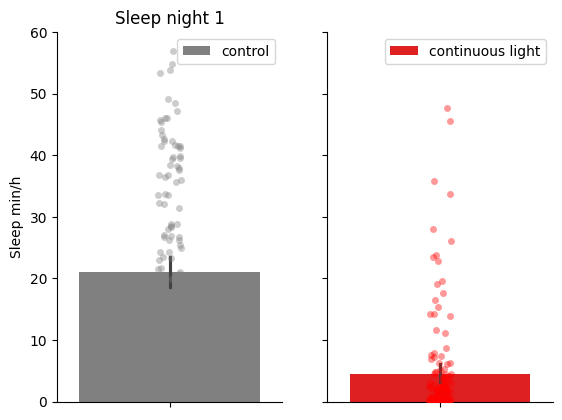

In [36]:
# Sleep Night 1
if group_nr == 2:
    fig, (ax1, ax2) = plt.subplots(1, group_nr, sharey=True)
elif group_nr ==3:
    fig, (ax1, ax2, ax3) = plt.subplots(1, group_nr, sharey=True)
ax = sns.barplot(ax=ax1,y=df_rest_control_night1, color = "grey", orient="v", label=ctrl_name)
ax = sns.stripplot(ax=ax1,data=df_rest_control_night1, dodge=True, color="grey", alpha = 0.4,jitter = 0.05)

ax = sns.barplot(ax=ax2, y=df_rest_continuouslight_night1, color = "red", orient="v", label=group_1_name)
ax = sns.stripplot(ax=ax2,data=df_rest_continuouslight_night1, dodge=True, color="red", alpha = 0.4,jitter = 0.05)

if group_nr >=3:
    ax = sns.barplot(ax=ax3, y=df_rest_tapping_night1, color = "green", orient="v", label=group_2_name)
    ax = sns.stripplot(ax=ax3,data=df_rest_tapping_night1, dodge=True, color="green", alpha = 0.4,jitter = 0.05)

ax1.set_title("Sleep night 1")
ax1.set_ylabel("Sleep min/h")
ax1.set_ylim(0,lim_y_bp_sleep)
sns.despine(right=True, bottom=False)
ax.legend()
fig.savefig(path_graphics+r"\Bar_plot_sleep_night1.pdf")

In [37]:
#Independent t-test:
#control vs continuous
p = ss.ttest_ind(df_rest_control_night1, df_rest_continuouslight_night1, equal_var=False)
print("control vs "+group_1_name+" :", p)
with open(output_file, "a") as f:
    f.write("\n"+"Sleep night 1, control vs "+str(group_1_name)+" :"+"\n"+ str(p)+"\n")

if group_nr >=3:
    #control vs tapping
    p = ss.ttest_ind(df_rest_control_night1, df_rest_tapping_night1, equal_var=False)
    print("control vs "+group_2_name+" :", p)
    with open(output_file, "a") as f:
        f.write("Sleep night 1, control vs "+str(group_2_name)+" :"+"\n"+ str(p)+"\n")

control vs continuous light : TtestResult(statistic=11.336105011575402, pvalue=8.341030278229555e-24, df=222.27444341465772)


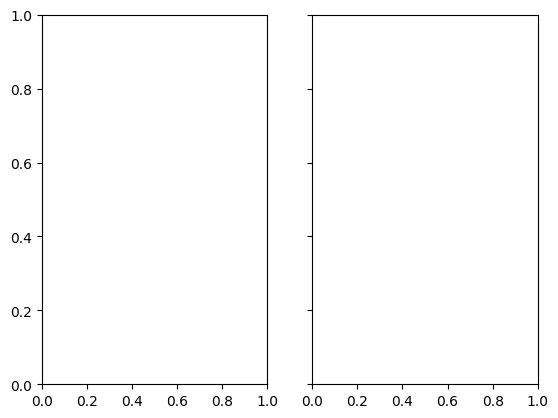

In [38]:
# Sleep Day 1
try:
    if group_nr == 2:
        fig, (ax1, ax2) = plt.subplots(1, group_nr, sharey=True)
    elif group_nr ==3:
        fig, (ax1, ax2, ax3) = plt.subplots(1, group_nr, sharey=True)
    ax = sns.barplot(ax=ax1,y=df_rest_control_day1, color = "grey", orient="v", label=ctrl_name)
    ax = sns.stripplot(ax=ax1,data=df_rest_control_day1, dodge=True, color="grey", alpha = 0.4,jitter = 0.05)
    
    ax = sns.barplot(ax=ax2, y=df_rest_continuouslight_day1, color = "red", orient="v", label=group_1_name)
    ax = sns.stripplot(ax=ax2,data=df_rest_continuouslight_day1, dodge=True, color="red", alpha = 0.4,jitter = 0.05)
    
    if group_nr >=3:
        ax = sns.barplot(ax=ax3, y=df_rest_tapping_day1, color = "green", orient="v", label=group_2_name)
        ax = sns.stripplot(ax=ax3,data=df_rest_tapping_day1, dodge=True, color="green", alpha = 0.4,jitter = 0.05)
    
    ax1.set_title("Sleep day 1")
    ax1.set_ylabel("Sleep min/h")
    ax1.set_ylim(0,lim_y_bp_sleep)
    sns.despine(right=True, bottom=False)
    ax.legend()
    fig.savefig(path_graphics+r"\Bar_plot_sleep_day1.pdf")
except:
    pass

In [39]:
try:
    #Independent t-test:
    #control vs group1
    p = ss.ttest_ind(df_rest_control_day1, df_rest_continuouslight_day1, equal_var=False)
    print("control vs "+group_1_name+" :", p)
    with open(output_file, "a") as f:
        f.write("\n"+"Sleep day 1, control vs "+str(group_1_name)+" :"+"\n"+ str(p)+"\n")

    if group_nr >=3:
        #control vs group2
        p = ss.ttest_ind(df_rest_control_day1, df_rest_tapping_day1, equal_var=False)
        print("control vs "+group_2_name+" :", p)
        with open(output_file, "a") as f:
            f.write("Sleep day 1, control vs "+str(group_2_name)+" :"+"\n"+ str(p)+"\n")
except:
    pass

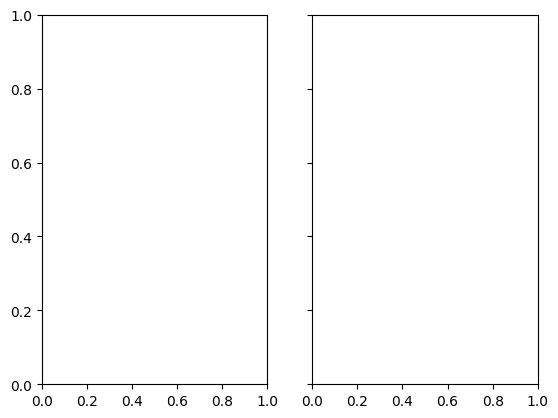

In [40]:
# Sleep Rebound Phase
try:
    if group_nr == 2:
        fig, (ax1, ax2) = plt.subplots(1, group_nr, sharey=True)
    elif group_nr ==3:
        fig, (ax1, ax2, ax3) = plt.subplots(1, group_nr, sharey=True)
    ax = sns.barplot(ax=ax1,y=df_rest_control_rebound, color = "grey", orient="v", label="control")
    ax = sns.stripplot(ax=ax1,data=df_rest_control_rebound, dodge=True, color="grey", alpha = 0.4,jitter = 0.05)
    
    ax = sns.barplot(ax=ax2, y=df_rest_tapping_rebound, color = "red", orient="v", label=group_1_name)
    ax = sns.stripplot(ax=ax2,data=df_rest_tapping_rebound, dodge=True, color="red", alpha = 0.4,jitter = 0.05)

    if group_nr >=3:
        ax = sns.barplot(ax=ax3, y=df_rest_continuouslight_rebound, color = "green", orient="v", label=group_2_name)
        ax = sns.stripplot(ax=ax3,data=df_rest_continuouslight_rebound, dodge=True, color="green", alpha = 0.4,jitter = 0.05)
    
    ax1.set_title("Sleep during rebound phase")
    ax1.set_ylabel("Sleep min/h")
    ax1.set_ylim(0,lim_y_bp_sleep)
    sns.despine(right=True, bottom=False)
    ax.legend()
    fig.savefig(path_graphics+r"\Bar_plot_sleep_rebound.pdf")
except:
    pass

In [41]:
try:
    #Independent t-test:
    #control vs group1
    p = ss.ttest_ind(df_rest_control_rebound, df_rest_continuouslight_rebound, equal_var=False)
    print("control vs "+group_1_name+" :", p)
    with open(output_file, "a") as f:
        f.write("\n"+"Sleep test phase, control vs "+str(group_1_name)+" :"+"\n"+ str(p)+"\n")

    if group_nr >=3:
        #control vs group2
        p = ss.ttest_ind(df_rest_control_rebound, df_rest_tapping_rebound, equal_var=False)
        print("control vs "+group_2_name+" :", p)
        with open(output_file, "a") as f:
            f.write("Sleep test phase, control vs "+str(group_2_name)+" :"+"\n"+ str(p)+"\n")
except:
    pass

## Bar Graphs - Waking Activity

In [42]:
#ctrl
i = 0
wakeAct_night1_ctrl_list=list()
for key in ctrl_dict:
    wakeAct_night1_ctrl_list.append(pd.read_csv(ctrl_dict[key]+r"\output_binned_wakeAct_night1.csv", header=None))
    i= i+1
try:
    i = 0
    wakeAct_day1_ctrl_list=list()
    for key in ctrl_dict:
        wakeAct_day1_ctrl_list.append(pd.read_csv(ctrl_dict[key]+r"\output_binned_wakeAct_day1.csv", header=None))
        i= i+1
except:
    pass
try:
    i = 0
    wakeAct_testphase_ctrl_list=list()
    for key in ctrl_dict:
        wakeAct_testphase_ctrl_list.append(pd.read_csv(ctrl_dict[key]+r"\output_binned_wakeAct_testphase.csv", header=None))
        i= i+1
except:
    pass

#group1
i = 0
wakeAct_night1_grp1_list=list()
for key in cont_dict:
    wakeAct_night1_grp1_list.append(pd.read_csv(cont_dict[key]+r"\output_binned_wakeAct_night1.csv", header=None))
    i= i+1
try:
    i = 0
    wakeAct_day1_grp1_list=list()
    for key in cont_dict:
        wakeAct_day1_grp1_list.append(pd.read_csv(cont_dict[key]+r"\output_binned_wakeAct_day1.csv", header=None))
        i= i+1
except:
    pass
try:
    i = 0
    wakeAct_testphase_grp1_list=list()
    for key in cont_dict:
        wakeAct_testphase_grp1_list.append(pd.read_csv(cont_dict[key]+r"\output_binned_wakeAct_testphase.csv", header=None))
        i= i+1
except:
    pass

if group_nr >=3:
    #group2
    i = 0
    wakeAct_night1_grp2_list=list()
    for key in cont_dict:
        wakeAct_night1_grp2_list.append(pd.read_csv(grp2_dict[key]+r"\output_binned_wakeAct_night1.csv", header=None))
        i= i+1
    try:
        i = 0
        wakeAct_day1_grp2_list=list()
        for key in cont_dict:
            wakeAct_day1_grp2_list.append(pd.read_csv(grp2_dict[key]+r"\output_binned_wakeAct_day1.csv", header=None))
            i= i+1
    except:
        pass
    try:
        i = 0
        wakeAct_testphase_grp2_list=list()
        for key in grp2_dict:
            wakeAct_testphase_grp2_list.append(pd.read_csv(grp2_dict[key]+r"\output_binned_wakeAct_testphase.csv", header=None))
            i= i+1
    except:
        pass


## Concatenate

In [43]:
# concat controls
df_wakeAct_control_night1_concat = pd.concat(wakeAct_night1_ctrl_list, axis=1)
if len(wakeAct_day1_ctrl_list)!=0:
    df_wakeAct_control_day1_concat = pd.concat(wakeAct_day1_ctrl_list, axis=1)
if len(wakeAct_testphase_ctrl_list)!=0:
    df_wakeAct_control_rebound_concat = pd.concat(wakeAct_testphase_ctrl_list, axis=1)

In [44]:
# concat group1
df_wakeAct_continuouslight_night1_concat = pd.concat(wakeAct_night1_grp1_list, axis=1)
if len(wakeAct_day1_grp1_list)!=0:
    df_wakeAct_continuouslight_day1_concat = pd.concat(wakeAct_day1_grp1_list, axis=1)
if len(wakeAct_testphase_grp1_list)!=0:
    df_wakeAct_continuouslight_rebound_concat = pd.concat(wakeAct_testphase_grp1_list, axis=1)

In [45]:
#concat group2
try:
    # concat group1
    df_wakeAct_tapping_night1_concat = pd.concat(wakeAct_night1_grp2_list, axis=1)
    if len(wakeAct_day1_grp2_list)!=0:
        df_wakeAct_tapping_day1_concat = pd.concat(wakeAct_day1_grp2_list, axis=1)
    if len(wakeAct_testphase_grp2_list)!=0:
        df_wakeAct_tapping_rebound_concat = pd.concat(wakeAct_testphase_grp2_list, axis=1)
except:
    pass

## Mean per Fish

In [46]:
#control
df_wakeAct_control_night1 = df_wakeAct_control_night1_concat.mean(axis=0,skipna=True)
try:
    df_wakeAct_control_day1 = df_wakeAct_control_day1_concat.mean(axis=0,skipna=True)
except:
    pass
try:
    df_wakeAct_control_rebound = df_wakeAct_control_rebound_concat.mean(axis=0,skipna=True)
except:
    pass

In [47]:
#continuous light
df_wakeAct_continuouslight_night1 = df_wakeAct_continuouslight_night1_concat.mean(axis=0,skipna=True)
try:
    df_wakeAct_continuouslight_day1 = df_wakeAct_continuouslight_day1_concat.mean(axis=0,skipna=True)
except:
    pass
try:
    df_wakeAct_continuouslight_rebound = df_wakeAct_continuouslight_rebound_concat.mean(axis=0,skipna=True)
except:
    pass

In [48]:
#tapping
try:
    df_wakeAct_tapping_night1 = df_wakeAct_tapping_night1_concat.mean(axis=0,skipna=True)
    try:
        df_wakeAct_tapping_day1 = df_wakeAct_tapping_day1_concat.mean(axis=0,skipna=True)
    except:
        pass
    try:
        df_wakeAct_tapping_rebound = df_wakeAct_tapping_rebound_concat.mean(axis=0,skipna=True)
    except:
        pass
except:
    pass

## Bar plots

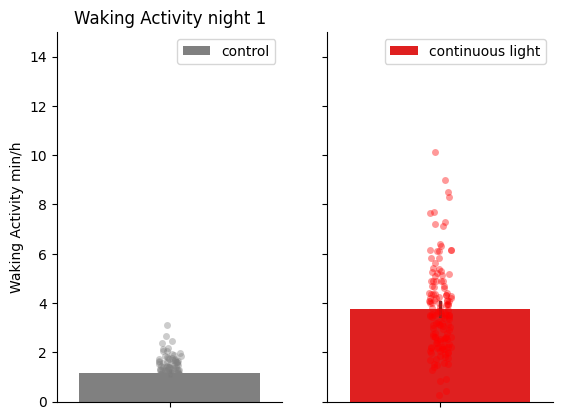

In [49]:
# Waking Activity Night 1

if group_nr == 2:
    fig, (ax1, ax2) = plt.subplots(1, group_nr, sharey=True)
elif group_nr ==3:
    fig, (ax1, ax2, ax3) = plt.subplots(1, group_nr, sharey=True)
ax = sns.barplot(ax=ax1,y=df_wakeAct_control_night1, color = "grey", orient="v", label=ctrl_name)
ax = sns.stripplot(ax=ax1,data=df_wakeAct_control_night1, dodge=True, color="grey", alpha = 0.4,jitter = 0.05)

ax = sns.barplot(ax=ax2, y=df_wakeAct_continuouslight_night1, color = "red", orient="v", label=group_1_name)
ax = sns.stripplot(ax=ax2,data=df_wakeAct_continuouslight_night1, dodge=True, color="red", alpha = 0.4,jitter = 0.05)
if group_nr >=3:
    ax = sns.barplot(ax=ax3, y=df_wakeAct_tapping_night1, color = "green", orient="v", label=group_2_name)
    ax = sns.stripplot(ax=ax3,data=df_wakeAct_tapping_night1, dodge=True, color="green", alpha = 0.4,jitter = 0.05)

ax1.set_title("Waking Activity night 1")
ax1.set_ylabel("Waking Activity min/h")
ax1.set_ylim(0,lim_y_bp_wake)
sns.despine(right=True, bottom=False)
ax.legend()
fig.savefig(path_graphics+r"\Bar_plot_wakeAct_night1.pdf")

In [50]:
try:
    #Independent t-test:
    #control vs group1
    p = ss.ttest_ind(df_wakeAct_control_night1, df_wakeAct_continuouslight_night1, equal_var=False)
    print("control vs "+group_1_name+" :", p)
    with open(output_file, "a") as f:
        f.write("\n"+"Waking Activity night 1, control vs "+str(group_1_name)+" :"+"\n"+ str(p)+"\n")

    if group_nr >=3:
        #control vs group2
        p = ss.ttest_ind(df_wakeAct_control_night1, df_wakeAct_tapping_night1, equal_var=False)
        print("control vs "+group_2_name+" :", p)
        with open(output_file, "a") as f:
            f.write("Waking Activity night 1, control vs "+str(group_2_name)+" :"+"\n"+ str(p)+"\n")
except:
    pass

control vs continuous light : TtestResult(statistic=-16.889686536578758, pvalue=1.0762196232045019e-37, df=163.65011983876977)


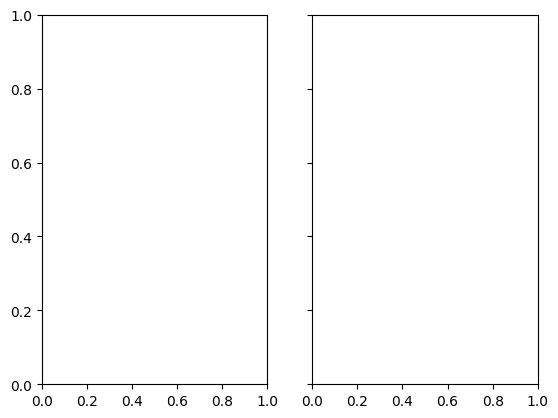

In [51]:
# Sleep Day 1
try:
    if group_nr == 2:
        fig, (ax1, ax2) = plt.subplots(1, group_nr, sharey=True)
    elif group_nr ==3:
        fig, (ax1, ax2, ax3) = plt.subplots(1, group_nr, sharey=True)
    ax = sns.barplot(ax=ax1,y=df_wakeAct_control_day1, color = "grey", orient="v", label=ctrl_name)
    ax = sns.stripplot(ax=ax1,data=df_wakeAct_control_day1, dodge=True, color="grey", alpha = 0.4,jitter = 0.05)
    
    ax = sns.barplot(ax=ax2, y=df_wakeAct_continuouslight_day1, color = "red", orient="v", label=group_1_name)
    ax = sns.stripplot(ax=ax2,data=df_wakeAct_continuouslight_day1, dodge=True, color="red", alpha = 0.4,jitter = 0.05)

    if group_nr >=3:
        ax = sns.barplot(ax=ax3, y=df_wakeAct_tapping_day1, color = "green", orient="v", label=group_2_name)
        ax = sns.stripplot(ax=ax3,data=df_wakeAct_tapping_day1, dodge=True, color="green", alpha = 0.4,jitter = 0.05)
    
    ax1.set_title("Waking Activity day 1")
    ax1.set_ylabel("Waking Activity min/h")
    ax1.set_ylim(0,lim_y_bp_wake)
    sns.despine(right=True, bottom=False)
    ax.legend()
    fig.savefig(path_graphics+r"\Bar_plot_wakeAct_day1.pdf")
except:
    pass

In [52]:
try:
    #Independent t-test:
    #control vs group1
    p = ss.ttest_ind(df_wakeAct_control_day1, df_wakeAct_continuouslight_day1, equal_var=False)
    print("control vs "+group_1_name+" :", p)
    with open(output_file, "a") as f:
        f.write("\n"+"Waking Activity day 1, control vs "+str(group_1_name)+" :"+"\n"+ str(p)+"\n")

    if group_nr >=3:
        #control vs group2
        p = ss.ttest_ind(df_wakeAct_control_day1, df_wakeAct_tapping_day1, equal_var=False)
        print("control vs "+group_2_name+" :", p)
        with open(output_file, "a") as f:
            f.write("Waking Activity day 1, control vs "+str(group_2_name)+" :"+"\n"+ str(p)+"\n")
except:
    pass

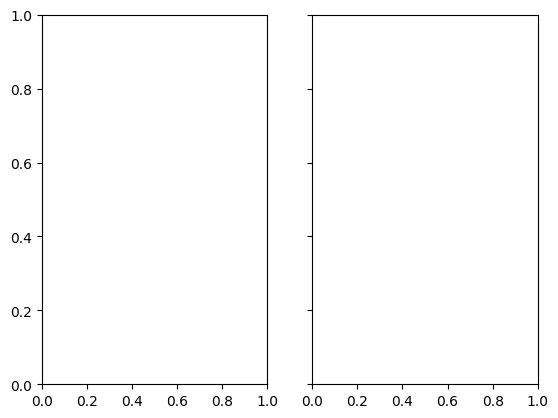

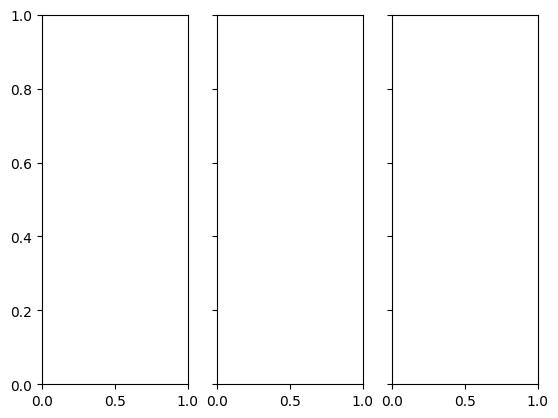

In [53]:
# Sleep Rebound Phase
try:
    if group_nr == 2:
        fig, (ax1, ax2) = plt.subplots(1, group_nr, sharey=True)
    elif group_nr ==3:
        fig, (ax1, ax2, ax3) = plt.subplots(1, group_nr, sharey=True)
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
    ax = sns.barplot(ax=ax1,y=df_wakeAct_control_rebound, color = "grey", orient="v", label=ctrl_name)
    ax = sns.stripplot(ax=ax1,data=df_wakeAct_control_rebound, dodge=True, color="grey", alpha = 0.4,jitter = 0.05)
    
    ax = sns.barplot(ax=ax2, y=df_wakeAct_continuouslight_rebound, color = "red", orient="v", label=group_1_name)
    ax = sns.stripplot(ax=ax2,data=df_wakeAct_continuouslight_rebound, dodge=True, color="red", alpha = 0.4,jitter = 0.05)
    
    if group_nr >=3:
        ax = sns.barplot(ax=ax3, y=df_wakeAct_tapping_rebound, color = "green", orient="v", label=group_2_name)
        ax = sns.stripplot(ax=ax3,data=df_wakeAct_tapping_rebound, dodge=True, color="green", alpha = 0.4,jitter = 0.05)
        
    ax1.set_title("Waking Activity during rebound phase")
    ax1.set_ylabel("Waking Activity min/h")
    ax1.set_ylim(0,lim_y_bp_wake)
    sns.despine(right=True, bottom=False)
    ax.legend()
    fig.savefig(path_graphics+r"\Bar_plot_wakeAct_rebound.pdf")
except:
    pass

In [54]:
try:
    #Independent t-test:
    #control vs group1
    p = ss.ttest_ind(df_wakeAct_control_rebound, df_wakeAct_continuouslight_rebound, equal_var=False)
    print("control vs "+group_1_name+" :", p)
    with open(output_file, "a") as f:
        f.write("\n"+"Waking Activity test phase, control vs "+str(group_1_name)+" :"+"\n"+ str(p)+"\n")

    if group_nr >=3:
        #control vs group2
        p = ss.ttest_ind(df_wakeAct_control_rebound, df_wakeAct_tapping_rebound, equal_var=False)
        print("control vs "+group_2_name+" :", p)
        with open(output_file, "a") as f:
            f.write("Waking Activity test phase, control vs "+str(group_2_name)+" :"+"\n"+ str(p)+"\n")
except:
    pass